In [66]:
import pandas as pd
import re
import os
import numpy as np
import sys
sys.path.append("../")
import seaborn as sns
from src import soporte_tablas as sp
import matplotlib.pyplot as plt

In [16]:
conexion = sp.conexion("Facua")
cursor = conexion.cursor()

In [17]:
cursor.execute(""" SELECT nombre
FROM supermercados s;""")
lista_supermercados = pd.DataFrame(cursor.fetchall())[0].to_list()
lista_supermercados

['mercadona', 'carrefour', 'eroski', 'dia', 'hipercor', 'alcampo']

In [18]:
cursor = conexion.cursor()
cursor.execute(""" SELECT producto
FROM productos p;""")
visual = cursor.fetchall()
visualdata= pd.DataFrame(visual)
visualdata.value_counts()                               #observamos que entre los supermercados el producto mas predominante a la venta
                                                        # es aceite de oliva, varias marcas...


0                                                             
aceite de oliva                                                   1607
carbonell aceite de oliva suave                                    718
aceite de oliva suave                                              654
carbonell gran seleccion aceite de oliva virgen extra botella      470
carbonell aceite de oliva virgen extra                             424
                                                                  ... 
aceite de oliva virgen extra cazorliva botella                       1
koipe sol aceite de girasol en spray                                 1
larsa leche entera de vaca de pastoreo                               1
jabon de manos en pastilla de aceite de oliva                        1
leche en polvo desnatada central lechera asturiana                   1
Name: count, Length: 1489, dtype: int64

In [19]:
cursor = conexion.cursor()
cursor.execute(""" SELECT categoria
FROM productos p;""")
visual = cursor.fetchall()
visualdata = pd.DataFrame(visual, columns=['categoria'])                
visualdata

,categoria
0,aceite de girasol
1,aceite de girasol
2,aceite de girasol
3,aceite de girasol
4,aceite de girasol
...,...
135862,leche
135863,leche
135864,leche
135865,leche


In [20]:
categoria = visualdata['categoria'].value_counts()
categoria                                           

categoria
leche                70971
aceite de oliva      58751
aceite de girasol     6145
Name: count, dtype: int64

In [21]:
categoria_porcentajes = categoria / categoria.sum() * 100

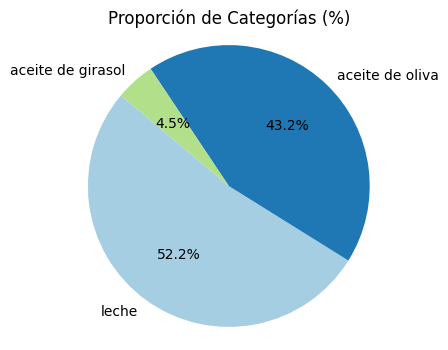

In [22]:
plt.figure(figsize=(4, 4))
plt.pie(categoria, labels=categoria.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporción de Categorías (%)')
plt.axis('equal')  
plt.show()                                                      #vemos la proporcion del total de cada categoria
                                                                #autopct se utiliza para formatear los porcentaj, adaptar el formato

In [23]:
cursor = conexion.cursor()
cursor.execute("""
 SELECT s.nombre AS supermercado, p.categoria
    FROM productos p
    INNER join supermercados s 
    ON p.id_supermercado = s.id_supermercado;
""")
visual = cursor.fetchall()
visualdata = pd.DataFrame(visual, columns=['supermercado', 'categoria'])
agrupo_categorias = visualdata.groupby('supermercado')['categoria'].value_counts().unstack().fillna(0)

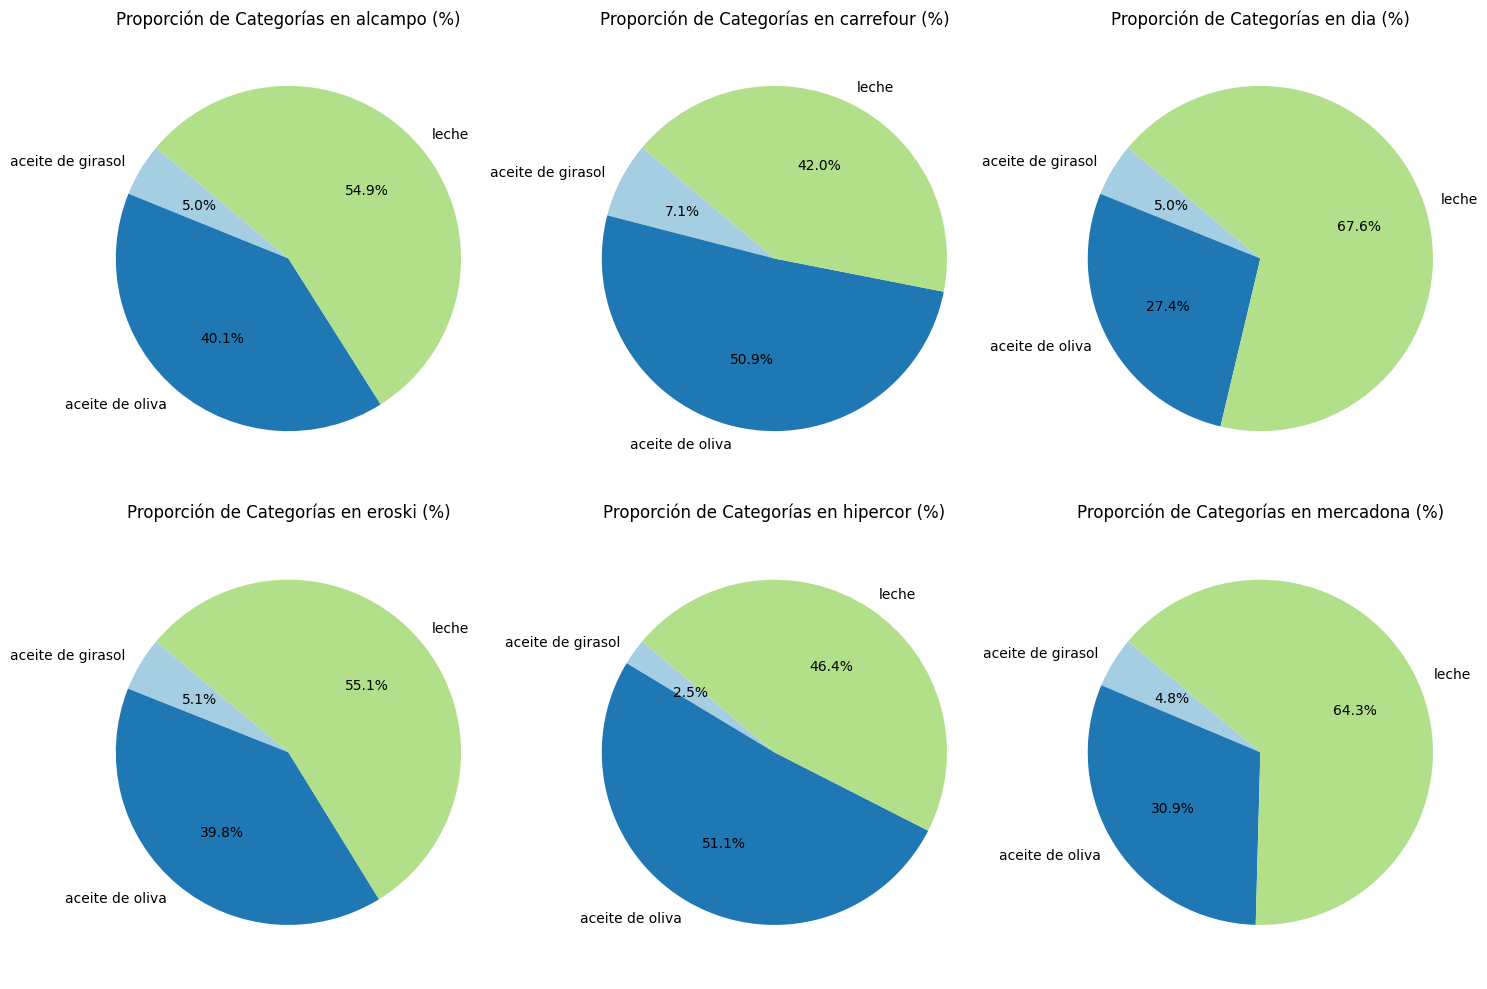

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  
axes = axes.flatten()  
colors = plt.cm.Paired.colors  
for i, supermercado in enumerate(agrupo_categorias.index):
    axes[i].pie(
        agrupo_categorias.loc[supermercado],
        labels=agrupo_categorias.columns,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors  #metemos los colores de antes
    )
    axes[i].set_title(f'Proporción de Categorías en {supermercado} (%)')
    axes[i].axis('equal')  

plt.tight_layout()
plt.show()                                         #observamos la proporcion de cada categoria en venta en los 
                                                    #6 supermercados

In [27]:
cursor=conexion.cursor()
cursor.execute("""
select *
from supermercados s 
inner join productos p 
on s.id_supermercado = p.id_producto 
inner join precios p2 
on p.id_supermercado = p2.id_supermercado ;
""")
visual = cursor.fetchall()


In [61]:
Base = pd.read_csv('../datos/datos_supermercados_limpios.csv')

In [73]:
Base['Categoria'].unique()

array(['aceite de girasol', 'aceite de oliva', 'leche'], dtype=object)

In [64]:
#Base['fecha'] = pd.to_datetime(Base['fecha'])

In [170]:
precios_promedio = Base.groupby(['Supermercado', 'Categoria'])['Precio'].mean().reset_index()
precios_leche = precios_promedio[precios_promedio['Categoria'] == 'aceite de girasol']
precios_leche                           #Precios medios de aceite girasol oliva en los  supermercados

,Supermercado,Categoria,Precio
0,alcampo,aceite de girasol,4.131640
3,carrefour,aceite de girasol,8.183978
6,dia,aceite de girasol,5.100328
9,eroski,aceite de girasol,3.522112
12,hipercor,aceite de girasol,3.613664
15,mercadona,aceite de girasol,4.123084


In [171]:
precios_maximos = Base.groupby(['Supermercado', 'Categoria'])['Precio'].max().reset_index()
precios_max_girasol = precios_maximos[precios_maximos['Categoria'] == 'aceite de girasol']
precios_max_girasol                         #precios maximos aceite de girasol

,Supermercado,Categoria,Precio
0,alcampo,aceite de girasol,15.88
3,carrefour,aceite de girasol,40.67
6,dia,aceite de girasol,10.99
9,eroski,aceite de girasol,11.99
12,hipercor,aceite de girasol,12.79
15,mercadona,aceite de girasol,6.91


In [91]:
precios_minimos = Base.groupby(['Supermercado', 'Categoria'])['Precio'].min().reset_index()
precios_min_girasol = precios_minimos [precios_minimos['Categoria'] == 'aceite de girasol']
precios_min_girasol                            #precios min aceite de girasol

,Supermercado,Categoria,Precio
0,alcampo,aceite de girasol,1.00
3,carrefour,aceite de girasol,1.45
6,dia,aceite de girasol,1.49
9,eroski,aceite de girasol,1.39
12,hipercor,aceite de girasol,1.40
15,mercadona,aceite de girasol,1.45


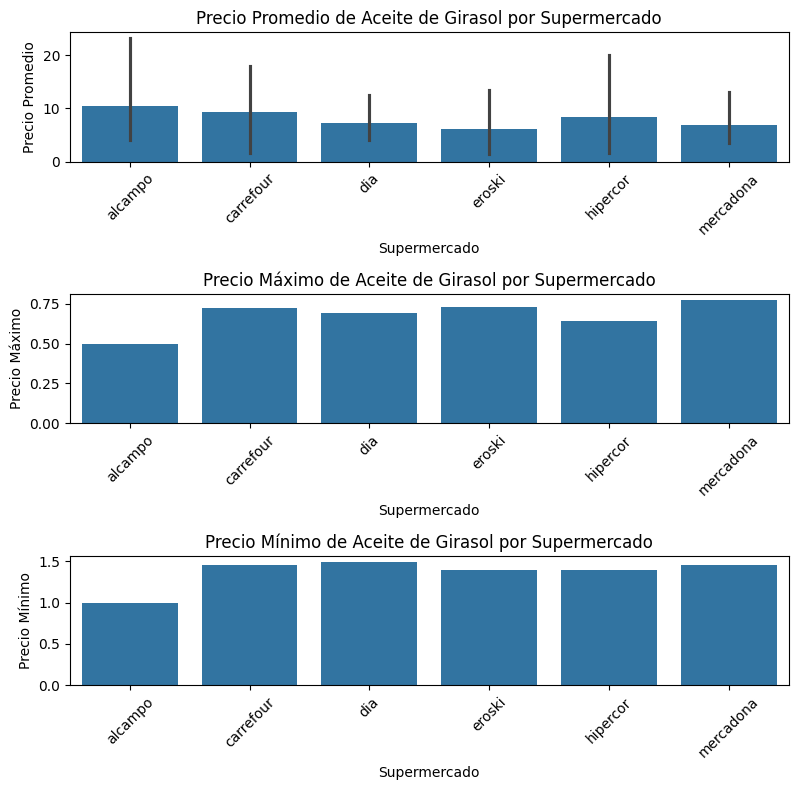

In [104]:
fig, axs = plt.subplots(3, 1, figsize=(8,8 ))
sns.barplot(data=precios_promedio, x='Supermercado', y='Precio', ax=axs[0])
axs[0].set_title('Precio Promedio de Aceite de Girasol por Supermercado')
axs[0].set_xlabel('Supermercado')
axs[0].set_ylabel('Precio Promedio')
axs[0].tick_params(axis='x', rotation=45)

sns.barplot(data=precios_max_girasol, x='Supermercado', y='Precio', ax=axs[1])
axs[1].set_title('Precio Máximo de Aceite de Girasol por Supermercado')
axs[1].set_xlabel('Supermercado')
axs[1].set_ylabel('Precio Máximo')
axs[1].tick_params(axis='x', rotation=45)

sns.barplot(data=precios_min_girasol, x='Supermercado', y='Precio', ax=axs[2])
axs[2].set_title('Precio Mínimo de Aceite de Girasol por Supermercado')
axs[2].set_xlabel('Supermercado')
axs[2].set_ylabel('Precio Mínimo')
axs[2].tick_params(axis='x', rotation=45)

# Ajustar el layout
plt.tight_layout()
plt.show()                                                  #obsevamos que proporcion cada supermercado tiene out pero alcampo parece tener una gama mas alta

In [102]:
precios_promedio = Base.groupby(['Supermercado', 'Categoria'])['Precio'].mean().reset_index()
precios_leche = precios_promedio[precios_promedio['Categoria'] == 'leche']
precios_leche                           #Precios medios de leche en los  supermercados aqui no tenemos en cuenta los packs

,Supermercado,Categoria,Precio
2,alcampo,leche,4.106988
5,carrefour,leche,1.685504
8,dia,leche,4.104039
11,eroski,leche,1.500988
14,hipercor,leche,1.605079
17,mercadona,leche,3.565963


In [100]:
precios_maximos = Base.groupby(['Supermercado', 'Categoria'])['Precio'].max().reset_index()
precios_max_girasol = precios_maximos[precios_maximos['Categoria'] == 'leche']
precios_max_girasol                           #Precios max de leche en los  supermercados aqui no tenemos en cuenta los packs

,Supermercado,Categoria,Precio
2,alcampo,leche,23.43
5,carrefour,leche,46.30
8,dia,leche,14.64
11,eroski,leche,6.85
14,hipercor,leche,16.95
17,mercadona,leche,9.36


In [101]:
precios_maximos = Base.groupby(['Supermercado', 'Categoria'])['Precio'].min().reset_index()
precios_max_girasol = precios_maximos[precios_maximos['Categoria'] == 'leche']
precios_max_girasol                         #Precios min de leche en los  supermercados aqui no tenemos en cuenta los packs

,Supermercado,Categoria,Precio
2,alcampo,leche,0.50
5,carrefour,leche,0.72
8,dia,leche,0.69
11,eroski,leche,0.73
14,hipercor,leche,0.64
17,mercadona,leche,0.77


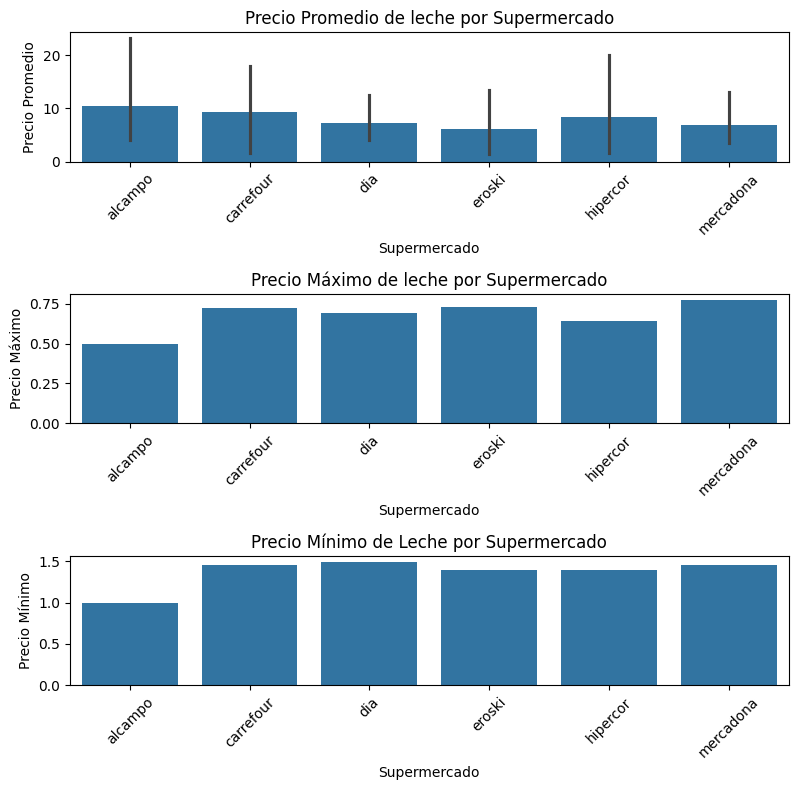

In [105]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
sns.barplot(data=precios_promedio, x='Supermercado', y='Precio', ax=axs[0])
axs[0].set_title('Precio Promedio de leche por Supermercado')
axs[0].set_xlabel('Supermercado')
axs[0].set_ylabel('Precio Promedio')
axs[0].tick_params(axis='x', rotation=45)

sns.barplot(data=precios_max_girasol, x='Supermercado', y='Precio', ax=axs[1])
axs[1].set_title('Precio Máximo de leche por Supermercado')
axs[1].set_xlabel('Supermercado')
axs[1].set_ylabel('Precio Máximo')
axs[1].tick_params(axis='x', rotation=45)

sns.barplot(data=precios_min_girasol, x='Supermercado', y='Precio', ax=axs[2])
axs[2].set_title('Precio Mínimo de Leche por Supermercado')
axs[2].set_xlabel('Supermercado')
axs[2].set_ylabel('Precio Mínimo')
axs[2].tick_params(axis='x', rotation=45)

# Ajustar el layout
plt.tight_layout()
plt.show()                                                  #obsevamos que proporcion cada supermercado tiene out pero alcampo parece tener una gama mas alta

In [113]:
precios_promedio = Base.groupby(['Supermercado', 'Categoria'])['Precio'].mean().reset_index()
precios_oliva = precios_promedio[precios_promedio['Categoria'] == 'aceite de oliva']
precios_oliva                         #Precios medios de aceite de oliva en los  supermercados aqui no tenemos en cuenta los packs

,Supermercado,Categoria,Precio
1,alcampo,aceite de oliva,23.117770
4,carrefour,aceite de oliva,17.976270
7,dia,aceite de oliva,12.429186
10,eroski,aceite de oliva,13.360939
13,hipercor,aceite de oliva,20.040074
16,mercadona,aceite de oliva,13.046578


In [114]:
precios_maximos = Base.groupby(['Supermercado', 'Categoria'])['Precio'].max().reset_index()
precios_max_oliva = precios_maximos[precios_maximos['Categoria'] == 'aceite de oliva']
precios_max_oliva                          #Precios max de aceite de oliva en los  supermercados aqui no tenemos en cuenta los packs

,Supermercado,Categoria,Precio
1,alcampo,aceite de oliva,62.99
4,carrefour,aceite de oliva,63.50
7,dia,aceite de oliva,39.65
10,eroski,aceite de oliva,64.59
13,hipercor,aceite de oliva,154.32
16,mercadona,aceite de oliva,28.80


In [172]:
precios_min = Base.groupby(['Supermercado', 'Categoria'])['Precio'].min().reset_index()
precios_min_oliva = precios_min[precios_maximos['Categoria'] == 'aceite de oliva']
precios_min_oliva                        #Precios min de aceite de oliva en los  supermercados aqui no tenemos en cuenta los packs

,Supermercado,Categoria,Precio
1,alcampo,aceite de oliva,2.83
4,carrefour,aceite de oliva,1.46
7,dia,aceite de oliva,2.15
10,eroski,aceite de oliva,1.89
13,hipercor,aceite de oliva,1.75
16,mercadona,aceite de oliva,2.90


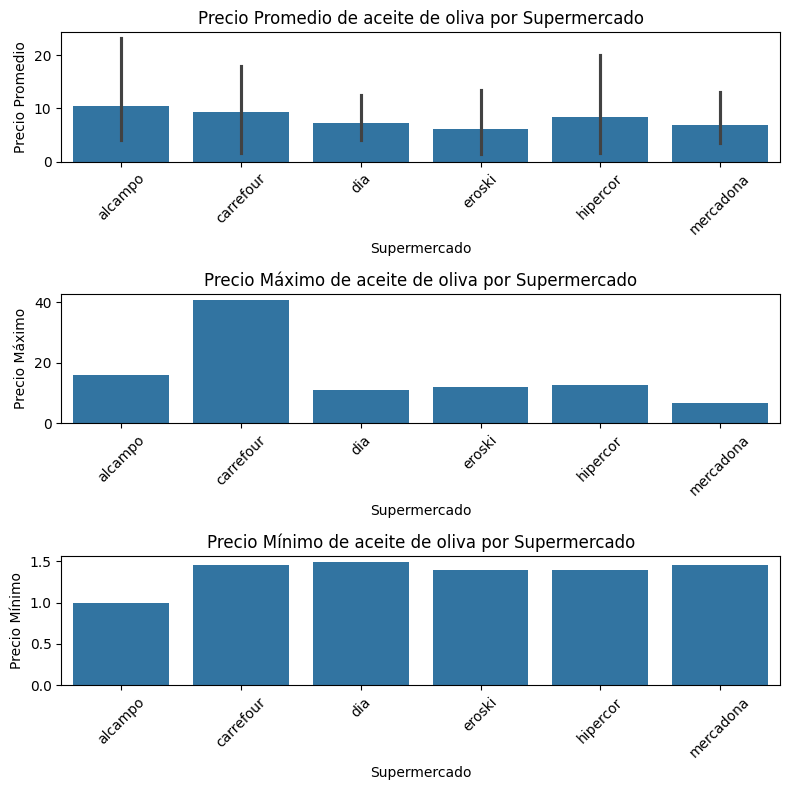

In [173]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
sns.barplot(data=precios_promedio, x='Supermercado', y='Precio', ax=axs[0])
axs[0].set_title('Precio Promedio de aceite de oliva por Supermercado')
axs[0].set_xlabel('Supermercado')
axs[0].set_ylabel('Precio Promedio')
axs[0].tick_params(axis='x', rotation=45)

sns.barplot(data=precios_max_girasol, x='Supermercado', y='Precio', ax=axs[1])
axs[1].set_title('Precio Máximo de aceite de oliva por Supermercado')
axs[1].set_xlabel('Supermercado')
axs[1].set_ylabel('Precio Máximo')
axs[1].tick_params(axis='x', rotation=45)

sns.barplot(data=precios_min_girasol, x='Supermercado', y='Precio', ax=axs[2])
axs[2].set_title('Precio Mínimo de aceite de oliva por Supermercado')
axs[2].set_xlabel('Supermercado')
axs[2].set_ylabel('Precio Mínimo')
axs[2].tick_params(axis='x', rotation=45)

# Ajustar el layout
plt.tight_layout()
plt.show()      

In [174]:
Evolucion_de_los_precios_medios = Base[Base['Categoria'] == 'leche'].groupby(['fecha', 'Supermercado'])['Precio'].mean().reset_index()


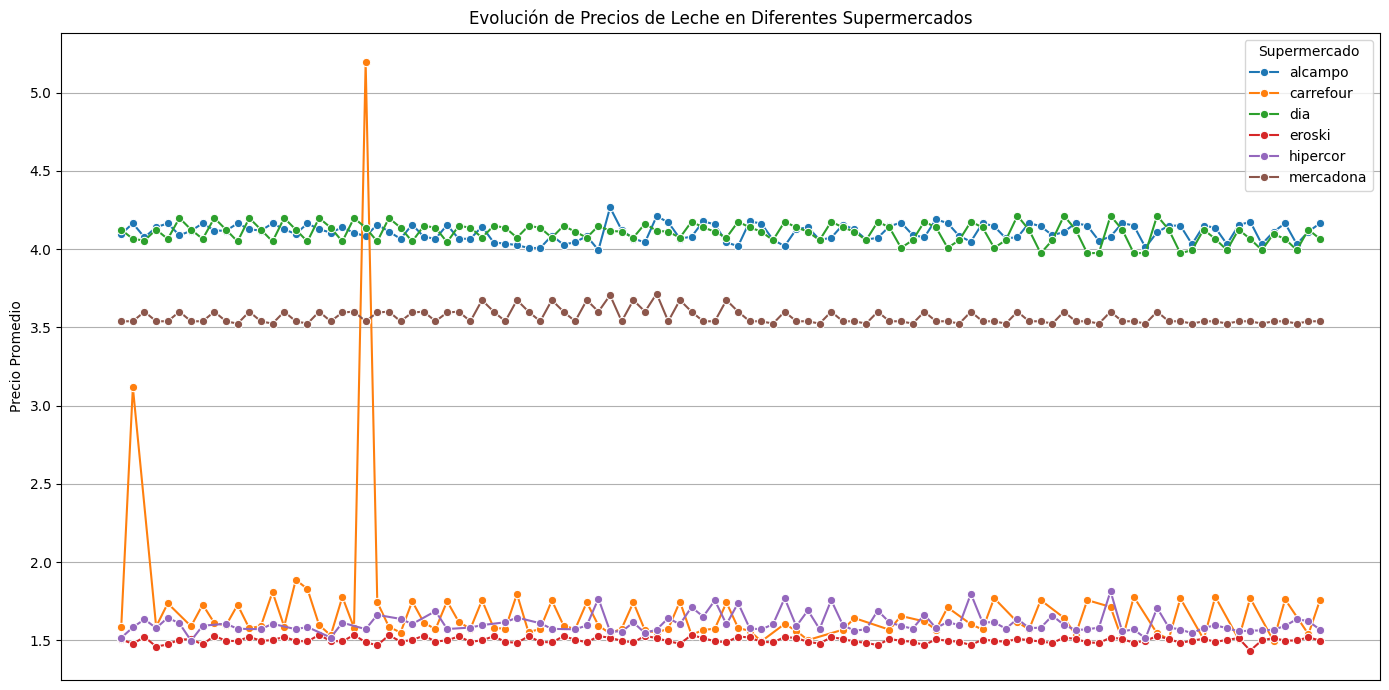

In [156]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=Evolucion_de_los_precios_medios, x='fecha', y='Precio', hue='Supermercado', marker='o')
plt.title('Evolución de Precios de Leche en Diferentes Supermercados')
plt.xlabel('')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.xticks([])
plt.grid()
plt.legend(title='Supermercado')
plt.tight_layout()
plt.show()                                       #evolucion de precios med des de el mes 07

In [143]:
Evolucion_de_los_precios_max = Base[Base['Categoria'] == 'leche'].groupby(['fecha', 'Supermercado'])['Precio'].max().reset_index()


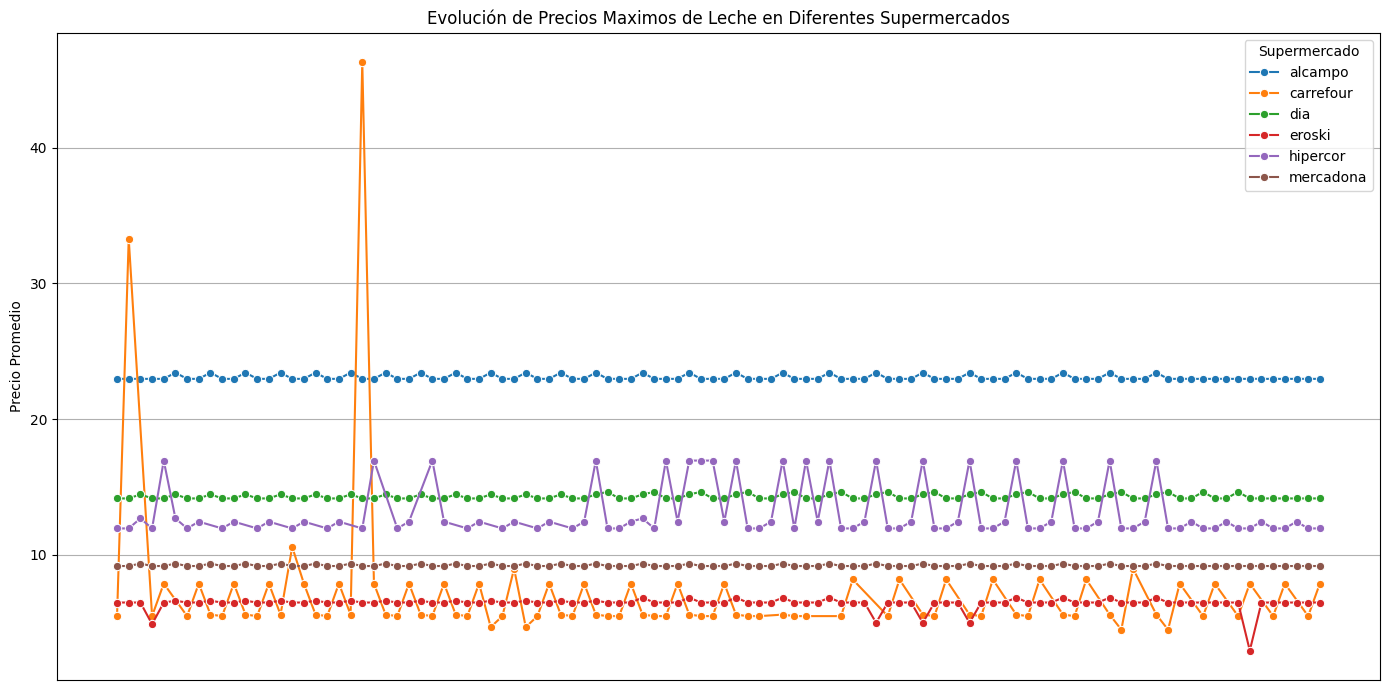

In [175]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=Evolucion_de_los_precios_max, x='fecha', y='Precio', hue='Supermercado', marker='o')
plt.title('Evolución de Precios Maximos de Leche en Diferentes Supermercados')
plt.xlabel('')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.xticks([])
plt.grid()
plt.legend(title='Supermercado')
plt.tight_layout()
plt.show()                                                      #evolucion de precios min des de el mes 07   

In [150]:

Evolucion_de_los_precios_min = Base[Base['Categoria'] == 'leche'].groupby(['fecha', 'Supermercado'])['Precio'].min().reset_index()

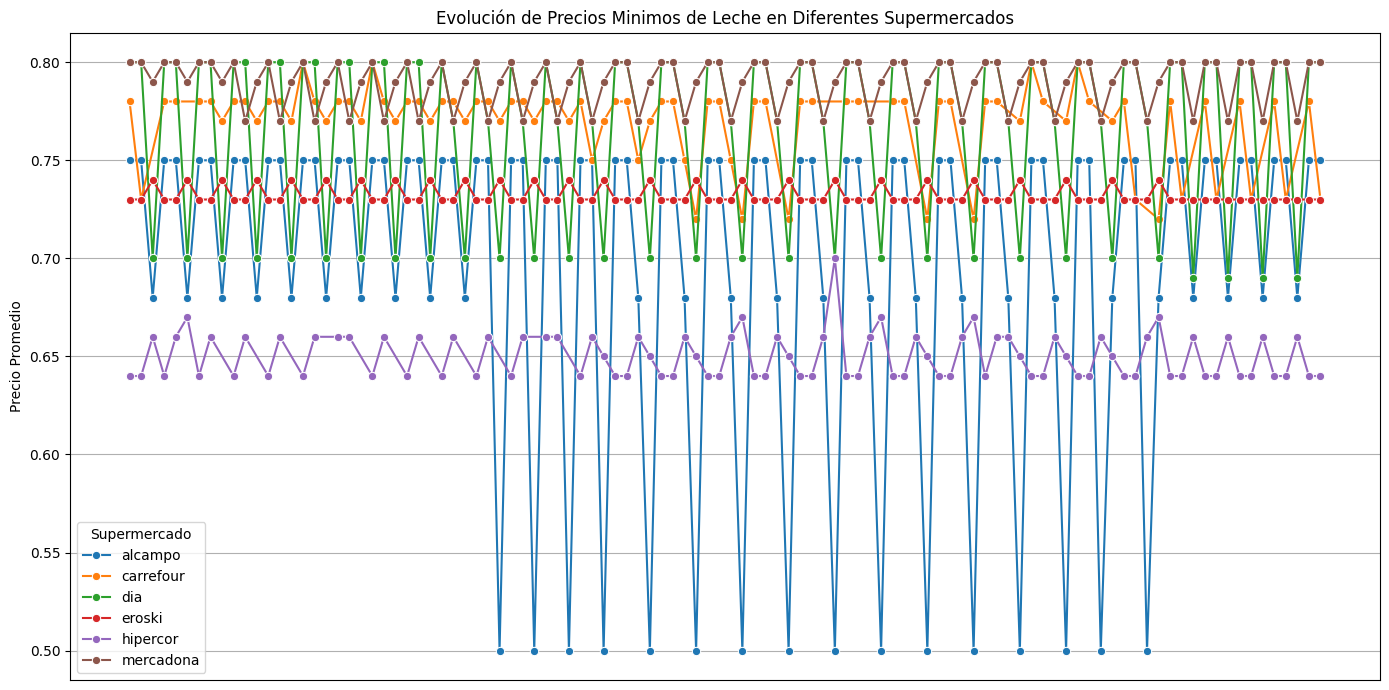

In [158]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=Evolucion_de_los_precios_min, x='fecha', y='Precio', hue='Supermercado', marker='o')
plt.title('Evolución de Precios Minimos de Leche en Diferentes Supermercados')
plt.xlabel('')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.xticks([])
plt.grid()
plt.legend(title='Supermercado')
plt.tight_layout()
plt.show()                                                          #evolucion de precios min des de el mes

In [ ]:
#investigacion= el alcampo tiene dias todo a 1 euros y se ven claramente los picos


In [176]:
Base.head(2
          )

,Unnamed: 0.1,Unnamed: 0,fecha,Precio,Supermercado,Categoria,producto,Marca,Volumen,Porcentaje,id_supermercado
0,0,0,12/07/2024,1.45,mercadona,aceite de girasol,aceite de girasol refinado,hacendado,1 l,0.0,1
1,1,1,13/07/2024,1.45,mercadona,aceite de girasol,aceite de girasol refinado,hacendado,1 l,0.0,1


Anomalías detectadas:
          fecha Supermercado    Precio  Porcentaje
7    01/09/2024    carrefour  3.117821   96.788891
18   02/08/2024    carrefour  1.588022  -49.066280
120  08/08/2024    carrefour  5.194026  228.527892
126  08/09/2024    carrefour  1.744409  -66.415097


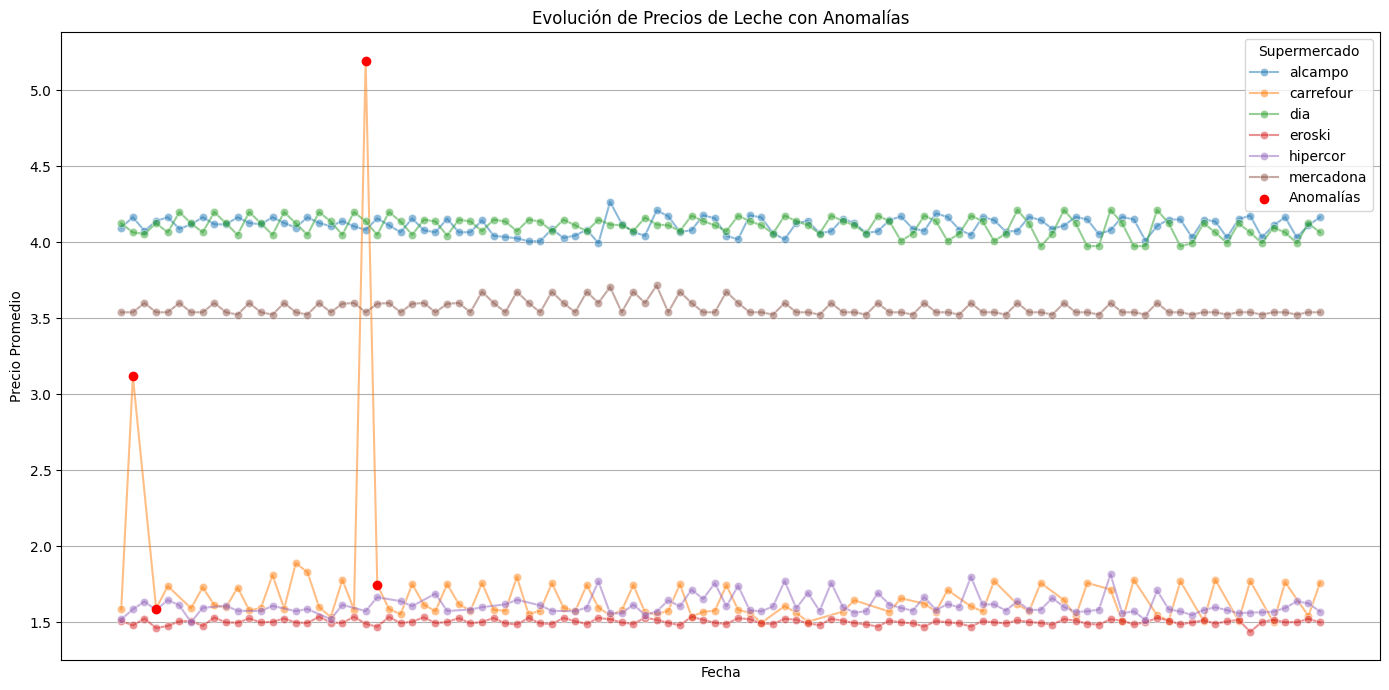

In [177]:
leche_data = Base[Base['Categoria'] == 'leche']
precios_promedio = leche_data.groupby(['fecha', 'Supermercado'])['Precio'].mean().reset_index()

precios_promedio['Porcentaje'] = precios_promedio.groupby('Supermercado')['Precio'].pct_change() * 100

umbral = 20
anomalias = precios_promedio[(precios_promedio['Porcentaje'].abs() > umbral)]
print("Anomalías detectadas:")
print(anomalias)
                                                        #puntitos son anomalias 
plt.figure(figsize=(14, 7))
sns.lineplot(data=precios_promedio, x='fecha', y='Precio', hue='Supermercado', marker='o', alpha=0.5)
plt.scatter(anomalias['fecha'], anomalias['Precio'], color='red', label='Anomalías', zorder=5)
plt.title('Evolución de Precios de Leche con Anomalías')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.xticks([])
plt.grid()
plt.legend(title='Supermercado')
plt.tight_layout()
plt.show()

Anomalías detectadas:
          fecha Supermercado    Precio  Porcentaje
1    01/08/2024      alcampo  4.071429  -20.272286
8    01/09/2024    carrefour  6.228333  -25.373432
20   02/08/2024    carrefour  8.346000   34.000535
36   03/07/2024      alcampo  3.191250  -23.471223
37   03/08/2024      alcampo  4.067857   27.469084
..          ...          ...       ...         ...
584  29/07/2024      alcampo  4.051429   27.403414
591  29/08/2024    carrefour  6.385000  -23.496286
601  30/06/2024      alcampo  5.106667   23.905257
602  30/07/2024      alcampo  4.051429  -20.663931
603  30/07/2024    carrefour  8.346000   30.712608

[70 rows x 4 columns]


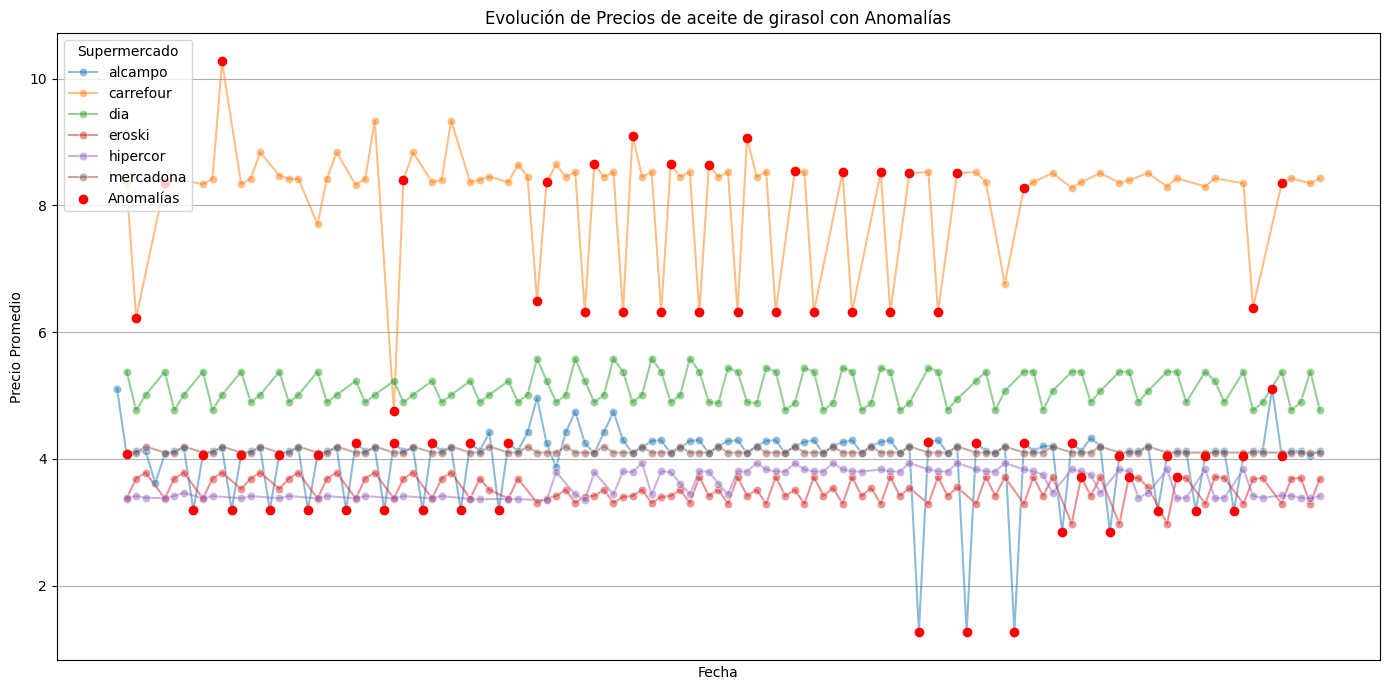

In [168]:
leche_data = Base[Base['Categoria'] == 'aceite de girasol']
precios_promedio = leche_data.groupby(['fecha', 'Supermercado'])['Precio'].mean().reset_index()

precios_promedio['Porcentaje'] = precios_promedio.groupby('Supermercado')['Precio'].pct_change() * 100

umbral = 20
anomalias = precios_promedio[(precios_promedio['Porcentaje'].abs() > umbral)]
print("Anomalías detectadas:")
print(anomalias)
                                                        #puntitos son anomalias 
plt.figure(figsize=(14, 7))
sns.lineplot(data=precios_promedio, x='fecha', y='Precio', hue='Supermercado', marker='o', alpha=0.5)
plt.scatter(anomalias['fecha'], anomalias['Precio'], color='red', label='Anomalías', zorder=5)
plt.title('Evolución de Precios de aceite de girasol con Anomalías')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.xticks([])
plt.grid()
plt.legend(title='Supermercado')
plt.tight_layout()
plt.show()

Anomalías detectadas:
          fecha Supermercado     Precio  Porcentaje
64   03/10/2024     hipercor   7.450000  -61.250574
75   04/08/2024     hipercor  21.035879  181.228334
87   04/10/2024     hipercor   7.450000  -62.808635
92   05/07/2024     hipercor  19.140400  156.918121
110  05/10/2024     hipercor   7.450000  -62.767269
115  06/07/2024     hipercor  19.140400  156.918121
133  06/10/2024     hipercor   7.450000  -63.424803
144  07/08/2024     hipercor  20.343945  171.977874
156  07/10/2024     hipercor   7.450000  -63.082806
164  08/08/2024    carrefour  14.188676  -22.259913
167  08/08/2024     hipercor  20.293761  171.306971
170  08/09/2024    carrefour  18.423187   29.844294
179  08/10/2024     hipercor   7.450000  -63.714257
190  09/08/2024     hipercor  20.802589  178.109476
202  09/10/2024     hipercor   7.450000  -62.493325
207  10/07/2024     hipercor  19.081600  156.128859
225  10/10/2024     hipercor   7.450000  -62.052762
231  11/07/2024     hipercor  20.484035  1

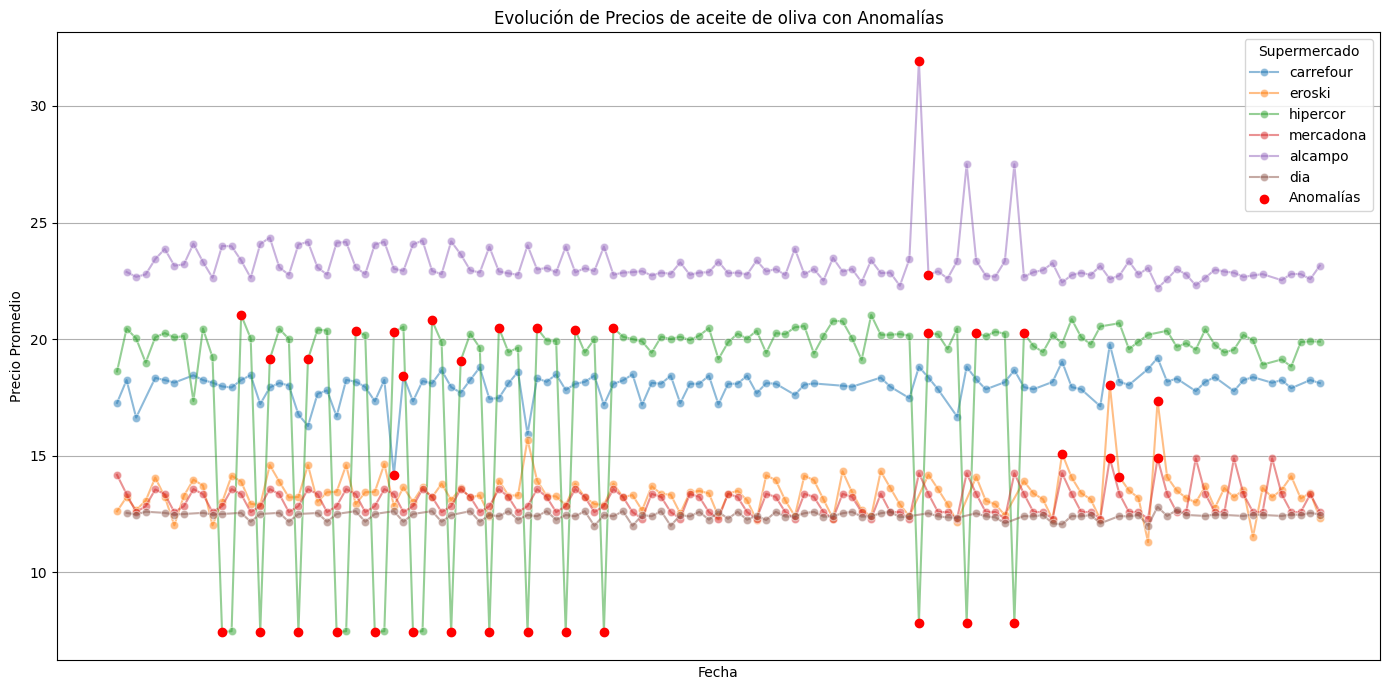

In [169]:
leche_data = Base[Base['Categoria'] == 'aceite de oliva']
precios_promedio = leche_data.groupby(['fecha', 'Supermercado'])['Precio'].mean().reset_index()

precios_promedio['Porcentaje'] = precios_promedio.groupby('Supermercado')['Precio'].pct_change() * 100

umbral = 20
anomalias = precios_promedio[(precios_promedio['Porcentaje'].abs() > umbral)]
print("Anomalías detectadas:")
print(anomalias)
                                                        #puntitos son anomalias 
plt.figure(figsize=(14, 7))
sns.lineplot(data=precios_promedio, x='fecha', y='Precio', hue='Supermercado', marker='o', alpha=0.5)
plt.scatter(anomalias['fecha'], anomalias['Precio'], color='red', label='Anomalías', zorder=5)
plt.title('Evolución de Precios de aceite de oliva con Anomalías')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.xticks([])
plt.grid()
plt.legend(title='Supermercado')
plt.tight_layout()
plt.show()